In [42]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd

def get_github_contributions(user:str, from_:str='2020-01-01'):
    req_url = f'https://github.com/users/{user}/contributions?from={from_}'
    response = urlopen(req_url)
    html = response.read().decode()
    soup = BeautifulSoup(html, "html.parser")
    data = []
    for elem in soup.find_all('rect'):
        if 'data-date' in elem.attrs and 'data-count' in elem.attrs:
            data.append({'date': elem['data-date'], 'count': int(elem['data-count'])})
    df = pd.DataFrame(data)
    df['date'] = df['date'].apply(lambda x: datetime.fromisoformat(x).astimezone())
    df = df.set_index('date')
    return df

In [79]:
users = [
    'wan-nyan-wan',
    'hppRC',
    'sksat',
    'hideo54',
    'R-NK',
    'ajiyoshi',
    'co3k',
    'cynipe',
    'd-issy',
    'hagino3000',
    'konchanSS',
    'kushami',
    'makoga',
    'nekoya',
    'nishigori',
    'pei0804',
    'proshunsuke',
    'rail44',
    'S64',
    'shu22203',
    'takurinton',
    'tomill',
    'tomokatsu',
    'wanimaru47',
    'yamachu',
    'YOwatari',
    'yowcow',
    '1000ch',
    '110y',
    'b4b4r07',
    'aniket1743',
    'cocoiti',
    'cubicdaiya',
    'deyunanhai',
    'DQNEO',
    'drlau',
    'dtan4',
    'hanabokuro',
    'hirak',
    'hitsubunnu',
    'kaz',
    'kazegusuri',
    'KeisukeYamashita',
    'kikoando112',
    'metalunk',
    'micnncim',
    'moricho',
    'mshibuya',
    'nguyengiabk',
    'orfeon',
    'osamingo',
    'ra1028',
    'sadah',
    'shibuiwilliam',
    'shitian-ni',
    'siroken3',
    'syucream',
    'tanakaworld',
    'tjun',
    'toshi0607',
    'utahta',
    'vbanthia',
    'vvakame',
    'ymt2',
    'yoichitgy',
    'zchee'
]

In [81]:
import time
sum_by_user = {}
for user in users:
    print(user)
    sum_by_month = []
    df = get_github_contributions(user)
    for i in range(2,13):
        sum_by_month.append(df[(f'2020-{i-1:02}-01' <= df.index) & (df.index < f'2020-{i:02}-01')].sum()[0])
    sum_by_month.append(df[('2020-12-01' <= df.index) & (df.index < '2021-01-01')].sum()[0])
    sum_by_user[user] = sum_by_month
    time.sleep(0.5)

In [82]:
sum_by_user

{'wan-nyan-wan': [0, 0, 0, 4, 23, 120, 160, 116, 263, 114, 41, 31],
 'hppRC': [345, 165, 200, 336, 606, 450, 200, 99, 182, 179, 108, 139],
 'sksat': [9, 116, 107, 76, 54, 37, 16, 17, 5, 5, 36, 76],
 'hideo54': [19, 74, 167, 177, 95, 98, 45, 103, 261, 96, 134, 149],
 'R-NK': [56, 108, 60, 52, 133, 105, 181, 103, 169, 193, 239, 118],
 'ajiyoshi': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'co3k': [165, 107, 100, 101, 158, 83, 148, 119, 149, 99, 103, 157],
 'cynipe': [152, 315, 97, 279, 292, 103, 177, 64, 58, 11, 38, 18],
 'd-issy': [202, 220, 242, 102, 93, 38, 7, 0, 0, 21, 41, 96],
 'hagino3000': [64, 144, 80, 89, 72, 73, 115, 111, 104, 37, 71, 41],
 'konchanSS': [114, 191, 253, 190, 158, 183, 108, 72, 189, 160, 74, 102],
 'kushami': [1, 0, 3, 1, 11, 7, 11, 16, 140, 52, 22, 43],
 'makoga': [0, 0, 0, 4, 4, 6, 0, 0, 5, 2, 1, 0],
 'nekoya': [58, 88, 250, 120, 233, 153, 182, 181, 157, 239, 114, 86],
 'nishigori': [92, 79, 260, 280, 226, 189, 175, 283, 136, 149, 60, 104],
 'pei0804': [427, 320, 4

In [83]:
res = {}
for i in range(12):
    res[i+1] = 0
for user in sum_by_user:
    for i in range(12):
        res[i+1] += sum_by_user[user][i]
res

{1: 8749,
 2: 8664,
 3: 10015,
 4: 9459,
 5: 11696,
 6: 10847,
 7: 9277,
 8: 9476,
 9: 10829,
 10: 8846,
 11: 9098,
 12: 7859}

66


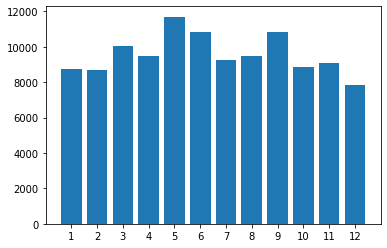

In [85]:
import matplotlib.pyplot as plt
plt.bar(range(len(res)), list(res.values()), align='center')
plt.xticks(range(len(res)), list(res.keys()))
plt.show()